In [662]:
import numpy as np
import matplotlib.pyplot as plt

In [665]:
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=200,noise=0.2,random_state=0)

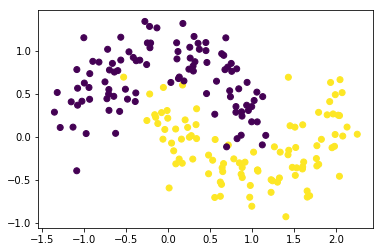

In [666]:
plt.scatter(x[:,0],x[:,1],c=y)

In [667]:
from sklearn.linear_model import LogisticRegressionCV
lrreg = LogisticRegressionCV()
lrreg.fit(x,y)
z = lrreg.predict(x)

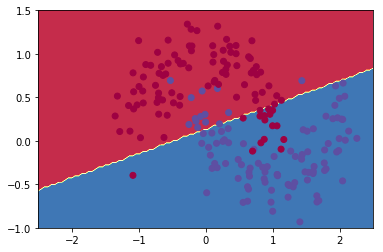

In [668]:
def ClassifierPlot(model,x,y):
    x1 = np.linspace(-2.5,2.5,100)
    x2 = np.linspace(-1,1.5,100)
    xx1,xx2 = np.meshgrid(x1,x2)
    inputx = np.array([np.ravel(xx1),np.ravel(xx2)]).T
    z = model.predict(inputx).reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,cmap=plt.cm.Spectral)
    plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Spectral)

ClassifierPlot(lrreg,x,y)

In [669]:
x=x.T

In [670]:
def initiation(hiddenlayerlen):
    param = {}
    np.random.seed(0)
    w1 = np.random.randn(hiddenlayerlen,x.shape[0])
    b1 = np.zeros([hiddenlayerlen,1])
    w2 = np.random.randn(1,hiddenlayerlen)
    b2 = np.zeros([1,1])
    param = {'w1':w1,'b1':b1,'w2':w2,'b2':b2}
    return param

In [674]:
def modelling(x,y,hiddenlayerlen=3,passes = 10):
    param = initiation(hiddenlayerlen)
    w1 = param['w1']
    b1 = param['b1']
    w2 = param['w2']
    b2 = param['b2']
    
    for i in range(0,passes):
        z1 = w1.dot(x)+b1
        a1 = np.tanh(z1)
        z2 = w2.dot(a1)+b2
        a2 = 1/(1+ np.exp(-z2))

        del3 = a2 - y.reshape(1,x.shape[1])
        del2 = w2.T.dot(del3)*(1-np.power(a1,2))
        dw2 = del3.dot(a1.T)/200
        db2 = np.sum(del3,axis=1,keepdims=True)/200
        dw1 = del2.dot(x.T)/200
        db1 = np.sum(del2,axis=1,keepdims=True)/200
        
        w1 += - 0.01*dw1
        b1 += - 0.01*db1
        w2 += - 0.01*dw2
        b2 += - 0.01*db2
        model = {'w1':w1,'b1':b1,'w2':w2,'b2':b2}
    return model

In [675]:
def predict(model,q):
    z1 = model['w1'].dot(q)+model['b1']
    a1 = np.tanh(z1)
    z2 = model['w2'].dot(a1)+model['b2']
    a2 = 1/(1+ np.exp(-z2))
    a2 = (a2>0.5)*1
    return a2

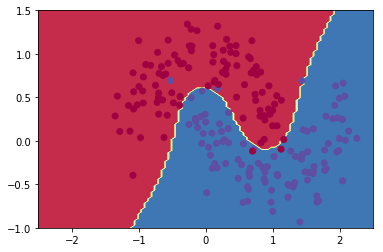

In [676]:
x1 = np.linspace(-2.5,2.5,100)
x2 = np.linspace(-1,1.5,100)
xx1,xx2 = np.meshgrid(x1,x2)
inputx = np.array([np.ravel(xx1),np.ravel(xx2)])
z = predict(modelling(x,y,50,20000),inputx).reshape(xx1.shape)
plt.contourf(xx1,xx2,z,cmap=plt.cm.Spectral)
plt.scatter(x[0,:],x[1,:],c=y,cmap=plt.cm.Spectral)